**Prediction of Heart Failure regarding Clinical data: A Machine Learning Approach**

**Problem**


This project aims to develop a robust machine learning model to predict heart failure in patients based on clinical data. Heart failure is a critical condition where the heart is unable to pump blood efficiently, leading to severe health risks and high mortality rates. By using various machine learning algorithms, this study analyzes patient data, including clinical, and laboratory information, to identify patterns and risk factors associated with heart failure. The goal is to build an accurate predictive model that can assist healthcare professionals in early diagnosis and personalized treatment planning, ultimately improving patient outcomes and reducing the burden of heart failure on healthcare systems.

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [4]:
# Load dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Exploring Data**

In [7]:
# check shape of data
data.shape

(299, 13)

In [8]:
# dtypes
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [9]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
data[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']] = data[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].astype(object)

In [11]:

# check missing data
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


**Descriptive Statistic**

In [12]:
# select numeric data
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [13]:
num_cols.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [14]:
# summary statistics of numerical variables
rp.summarize(num_cols[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,age,299,60.8339,60.0,141.4865,11.8948,0.6879,age
1,creatinine_phosphokinase,299,581.8395,250.0,941458.5715,970.2879,56.1132,creatinine_phosphokinase
2,ejection_fraction,299,38.0836,38.0,140.0635,11.8348,0.6844,ejection_fraction
3,platelets,299,263358.0293,262000.0,9565668749.4489,97804.2369,5656.1651,platelets
4,serum_creatinine,299,1.3939,1.1,1.0702,1.0345,0.0598,serum_creatinine
5,serum_sodium,299,136.6254,137.0,19.47,4.4125,0.2552,serum_sodium
6,time,299,130.2609,115.0,6023.9653,77.6142,4.4885,time


In [15]:
# select categorical data
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


In [16]:
cat_cols.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')

In [17]:
# summary statistics of categorical variables
rp.summary_cat(cat_cols[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']])

,Variable,Outcome,Count,Percent
0,anaemia,0,170,56.86
1,,1,129,43.14
2,diabetes,0,174,58.19
3,,1,125,41.81
4,high_blood_pressure,0,194,64.88
5,,1,105,35.12
6,sex,1,194,64.88
7,,0,105,35.12
8,smoking,0,203,67.89
9,,1,96,32.11


**Correlations between Variable**

In [18]:
# correlation: Pearson’s by default
num_cols.corr(method='pearson')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


**Skewness**

In [19]:
num_cols.skew()

,0
age,0.423062
creatinine_phosphokinase,4.463110
ejection_fraction,0.555383
platelets,1.462321
serum_creatinine,4.455996
serum_sodium,-1.048136
time,0.127803


**Data Visualizations**

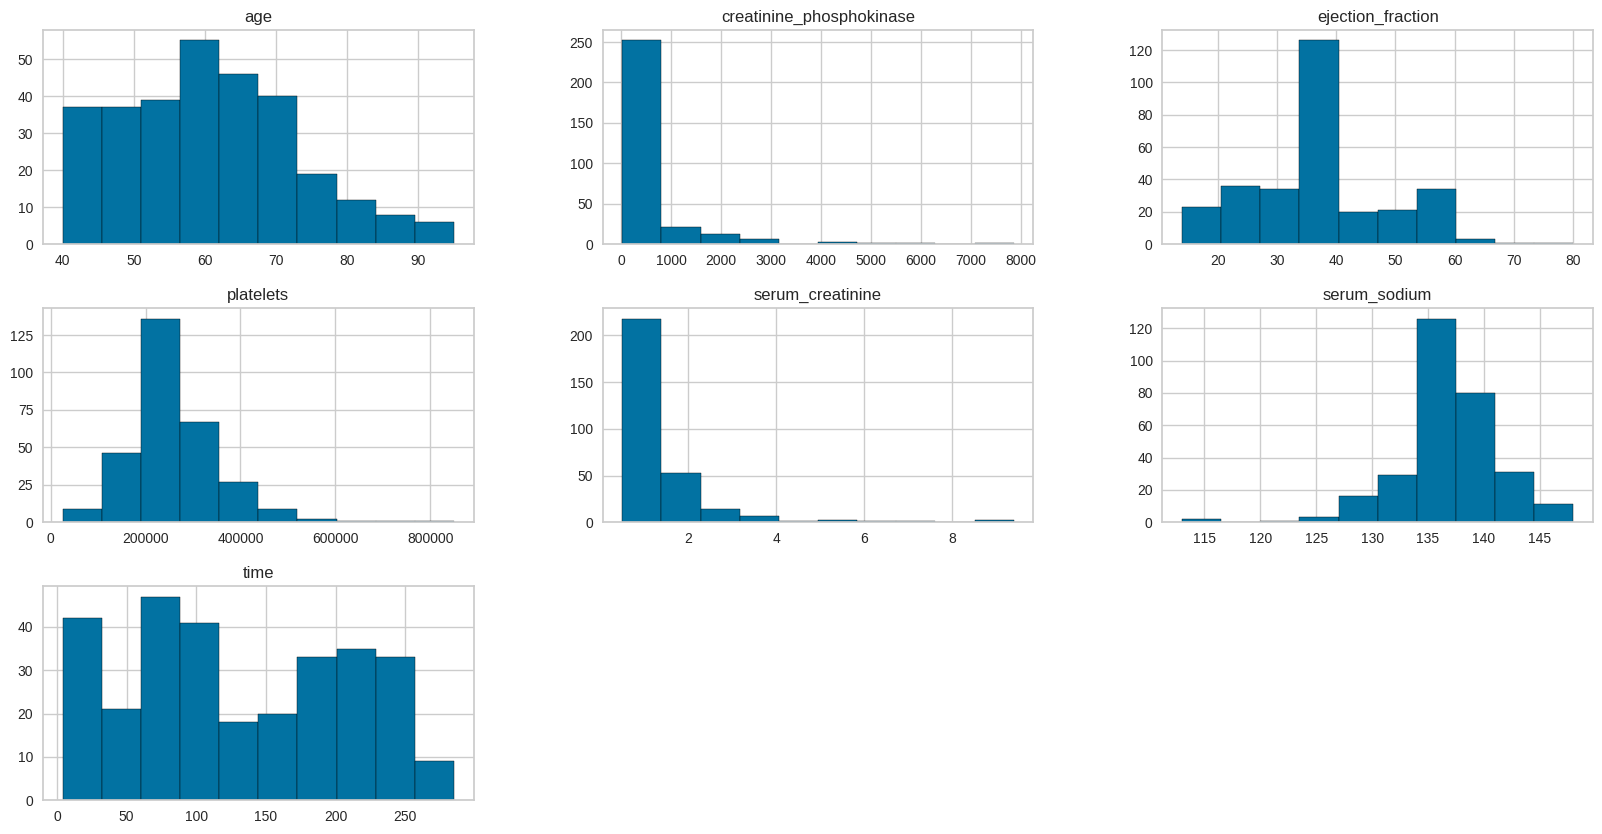

In [20]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show()

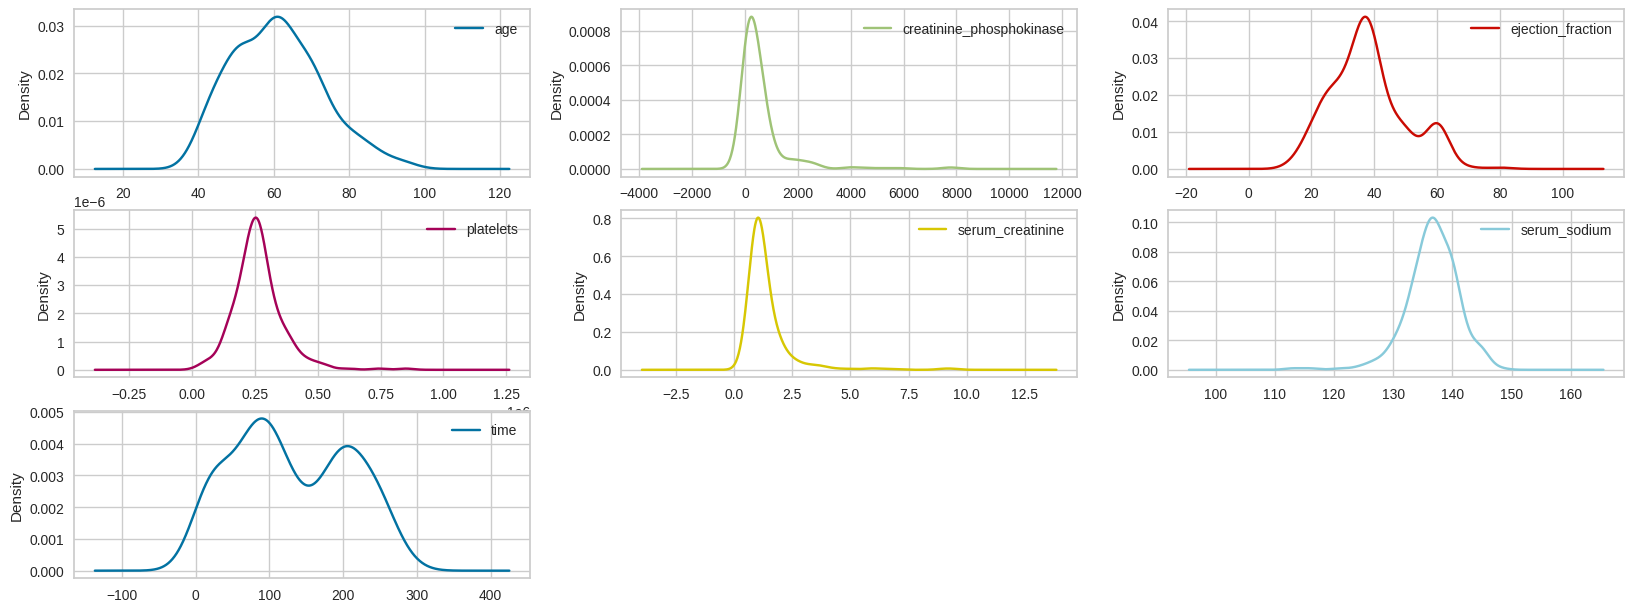

In [21]:
# Univariate distributions with density plot
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

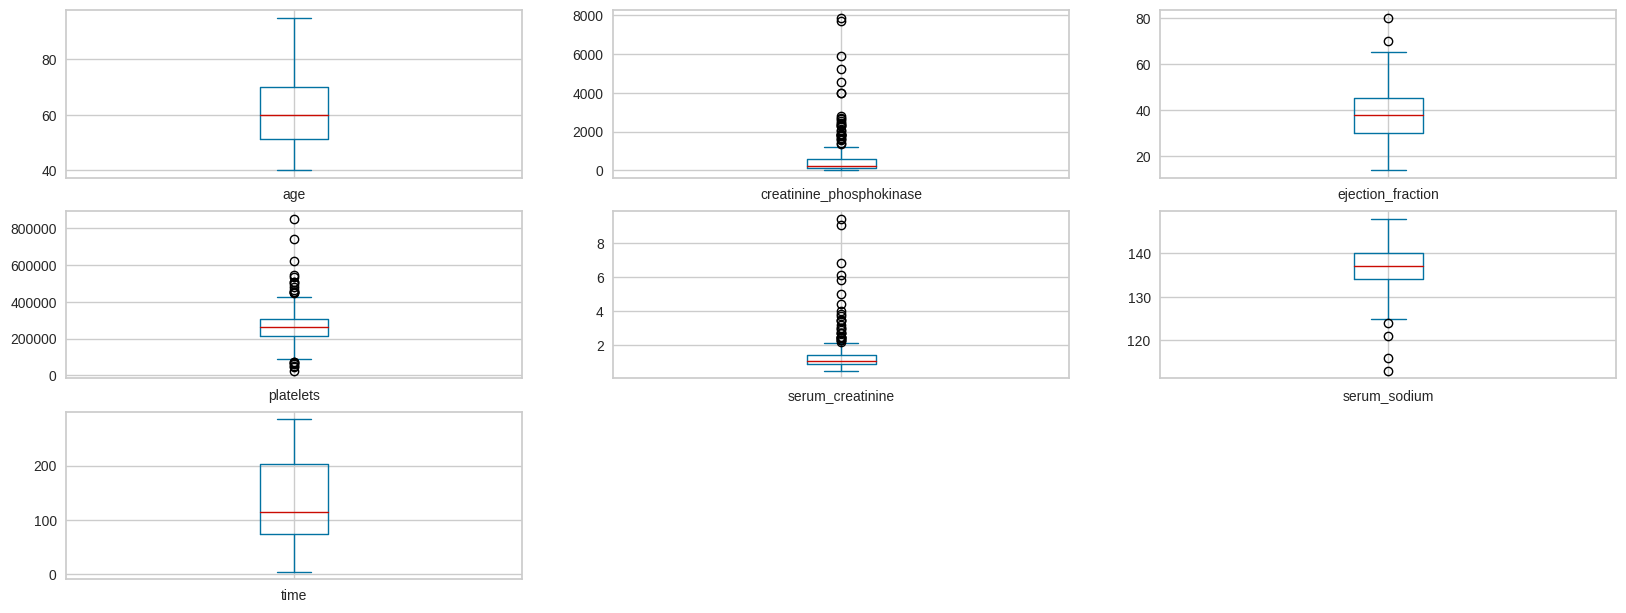

In [22]:
# Univariate distributions with box plots
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

In [23]:
num_cols.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

**Outliers**

In [24]:
# Remove outliers using IQR
Q1 = data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium' ]].quantile(0.25)
Q3 = data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']] >= lower_bound) & (data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']] <= upper_bound)]
print(data_no_outliers)

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    NaN      NaN                     582.0       NaN               20.0   
1    NaN      NaN                       NaN       NaN               38.0   
2    NaN      NaN                     146.0       NaN               20.0   
3    NaN      NaN                     111.0       NaN               20.0   
4    NaN      NaN                     160.0       NaN               20.0   
..   ...      ...                       ...       ...                ...   
294  NaN      NaN                      61.0       NaN               38.0   
295  NaN      NaN                       NaN       NaN               38.0   
296  NaN      NaN                       NaN       NaN               60.0   
297  NaN      NaN                       NaN       NaN               38.0   
298  NaN      NaN                     196.0       NaN               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0          

In [25]:
# Remove outliers using IQR method
data_no_outliers_iqr = data[~data.any(axis=1)]
print("Data after removing outliers using IQR:")
print(data_no_outliers_iqr)

Data after removing outliers using IQR:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


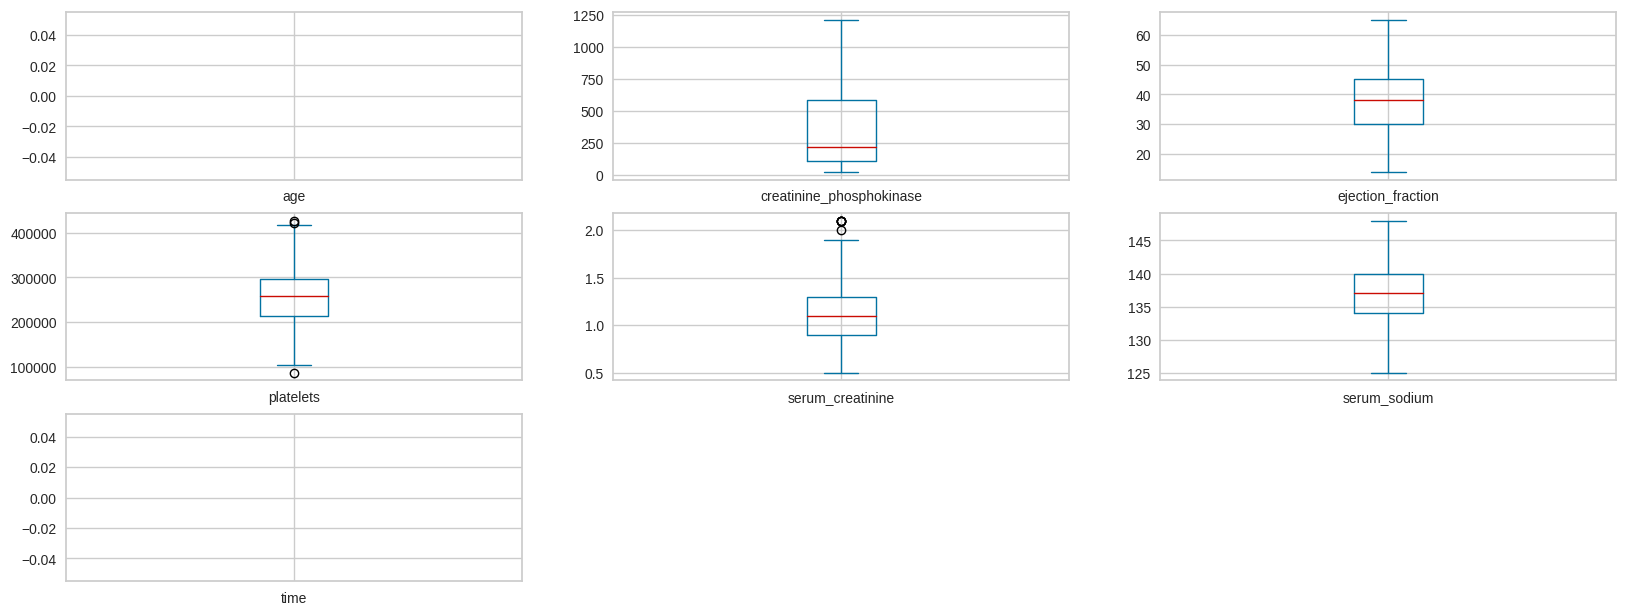

In [26]:
# Univariate distributions with box plots
data_no_outliers.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

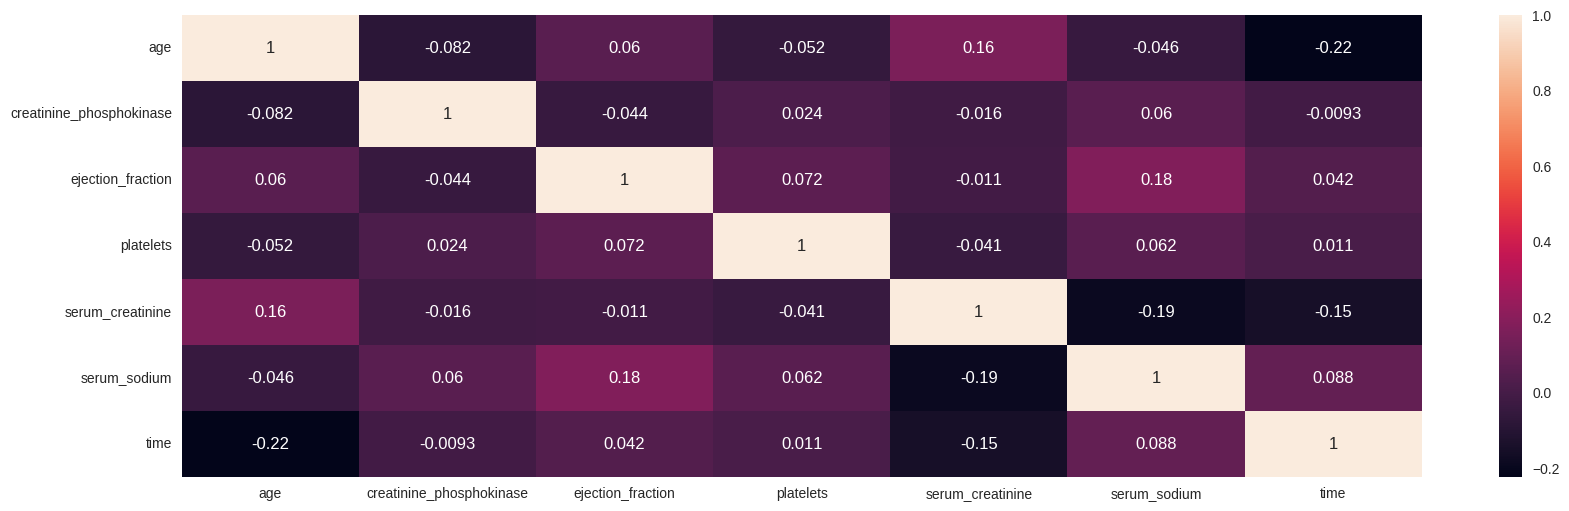

In [27]:
# Multivariate plots with correlations
plt.figure(figsize=(20,6))
corr = num_cols.corr()
sns.heatmap(corr, annot=True)
plt.show()

**Setup**

In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'DEATH_EVENT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


**Compare Models**

In [6]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8181,0.9258,0.6595,0.7976,0.6804,0.5635,0.5916,0.2020
et,Extra Trees Classifier,0.8088,0.8891,0.5548,0.8342,0.6383,0.5214,0.5524,0.1610
lightgbm,Light Gradient Boosting Machine,0.8040,0.8649,0.6119,0.7621,0.6562,0.5247,0.5465,0.3950
gbc,Gradient Boosting Classifier,0.7990,0.8702,0.6143,0.7835,0.6444,0.5138,0.5482,0.1430
xgboost,Extreme Gradient Boosting,0.7940,0.8791,0.6000,0.7538,0.6485,0.5076,0.5281,0.0700
lda,Linear Discriminant Analysis,0.7855,0.8719,0.6310,0.7076,0.6519,0.5013,0.5137,0.0280
lr,Logistic Regression,0.7807,0.8865,0.6024,0.7329,0.6305,0.4825,0.5068,0.7920
nb,Naive Bayes,0.7805,0.8355,0.4976,0.7083,0.5642,0.4393,0.4596,0.0480
ada,Ada Boost Classifier,0.7802,0.8264,0.5833,0.7251,0.6302,0.4778,0.4938,0.1270
ridge,Ridge Classifier,0.7712,0.8729,0.5857,0.6976,0.6190,0.4608,0.4771,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Create Model**

In [7]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9333,0.6667,0.6667,0.6667,0.5333,0.5333
1,0.9048,0.9333,0.6667,1.0000,0.8000,0.7407,0.7670
2,0.8571,0.9184,0.7143,0.8333,0.7692,0.6667,0.6708
3,0.8095,0.9286,0.7143,0.7143,0.7143,0.5714,0.5714
4,0.7143,0.9796,0.1429,1.0000,0.2500,0.1818,0.3162
5,0.8571,0.9082,0.5714,1.0000,0.7273,0.6400,0.6860
6,0.8095,0.8980,1.0000,0.6364,0.7778,0.6250,0.6742
7,0.8571,0.9184,0.7143,0.8333,0.7692,0.6667,0.6708
8,0.7619,0.8878,0.5714,0.6667,0.6154,0.4444,0.4472


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
# print model parameters
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Tune Model

In [9]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.9000,0.6667,0.5714,0.6154,0.4444,0.4472
1,0.9048,0.8889,0.8333,0.8333,0.8333,0.7667,0.7667
2,0.6667,0.7857,0.5714,0.5000,0.5333,0.2759,0.2774
3,0.8571,0.8724,0.7143,0.8333,0.7692,0.6667,0.6708
4,0.7619,0.6633,0.2857,1.0000,0.4444,0.3478,0.4588
5,0.7619,0.7398,0.2857,1.0000,0.4444,0.3478,0.4588
6,0.9048,0.8673,1.0000,0.7778,0.8750,0.8000,0.8165
7,0.7619,0.7143,0.5714,0.6667,0.6154,0.4444,0.4472
8,0.8571,0.9133,0.7143,0.8333,0.7692,0.6667,0.6708


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.9000,0.6667,0.5714,0.6154,0.4444,0.4472
1,0.9048,0.8889,0.8333,0.8333,0.8333,0.7667,0.7667
2,0.6667,0.7857,0.5714,0.5000,0.5333,0.2759,0.2774
3,0.8571,0.8724,0.7143,0.8333,0.7692,0.6667,0.6708
4,0.7619,0.6633,0.2857,1.0000,0.4444,0.3478,0.4588
5,0.7619,0.7398,0.2857,1.0000,0.4444,0.3478,0.4588
6,0.9048,0.8673,1.0000,0.7778,0.8750,0.8000,0.8165
7,0.7619,0.7143,0.5714,0.6667,0.6154,0.4444,0.4472
8,0.8571,0.9133,0.7143,0.8333,0.7692,0.6667,0.6708


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [12]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                 

**Analyze Model**

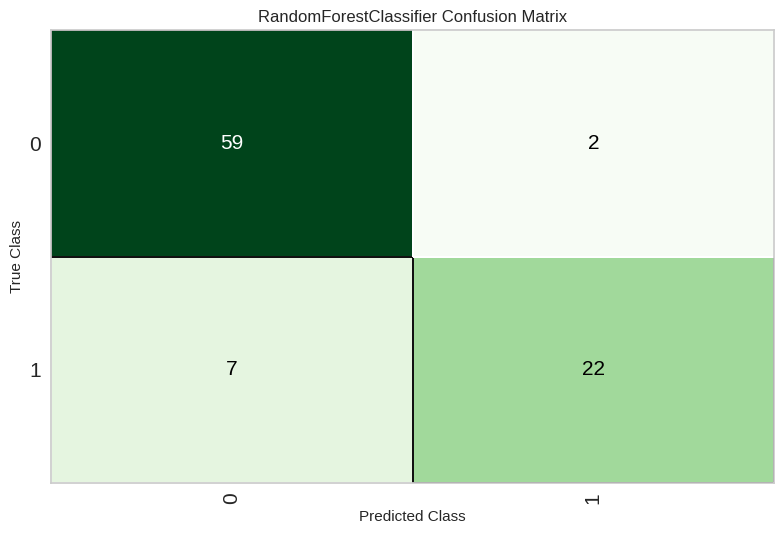

In [13]:
# plot confusion matrix
plot_model(rf, plot = 'confusion_matrix')

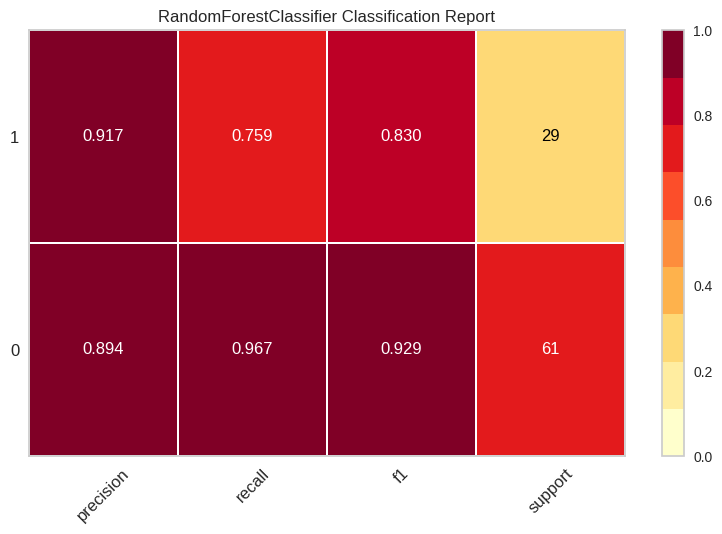

In [14]:
# plot class report
plot_model(rf, plot = 'class_report')

**Evaluate Model**

In [15]:
# evaluate model
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Finalize Model**

In [16]:
# finalize a model
finalize_model(rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'anaemia',
                                             'creatinine_phosphokinase',
                                             'diabetes', 'ejection_fraction',
                                             'high_blood_pressure', 'platelets',
                                             'serum_creatinine', 'serum_sodium',
                                             'sex', 'smoking', 'time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

**Prediction**

In [17]:
# predict on test set
holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9000,0.9460,0.7586,0.9167,0.8302,0.7602,0.7670


In [18]:
# show predictions
holdout_pred.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction_label,prediction_score
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1,1,0.60
129,53.0,1,270,1,35,0,227000.0,3.4,145,1,0,105,0,0,0.52
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33,1,1,0.68
130,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106,0,0,0.94
221,65.0,0,118,0,50,0,194000.0,1.1,145,1,1,200,0,0,0.83


In [19]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('DEATH_EVENT', axis=1, inplace=True)
new_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [20]:
# predict model on new_data
predictions = predict_model(rf, data = new_data)
predictions.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,prediction_label,prediction_score
0,75.0,0,582,0,20,1,265000.00000,1.9,130,1,0,4,1,0.98
1,55.0,0,7861,0,38,0,263358.03125,1.1,136,1,0,6,1,0.89
2,65.0,0,146,0,20,0,162000.00000,1.3,129,1,1,7,1,0.97
3,50.0,1,111,0,20,0,210000.00000,1.9,137,1,0,7,1,0.74
4,65.0,1,160,1,20,0,327000.00000,2.7,116,0,0,8,1,0.87


**Save Model**

In [22]:
# save pipeline
save_model(rf, 'E:\Heart_failure')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'anaemia',
                                              'creatinine_phosphokinase',
                                              'diabetes', 'ejection_fraction',
                                              'high_blood_pressure', 'platelets',
                                              'serum_creatinine', 'serum_sodium',
                                              'sex', 'smoking', 'time'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

In [23]:
# load pipeline
loaded_best_pipeline = load_model('E:\Heart_failure')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'anaemia',
                                             'creatinine_phosphokinase',
                                             'diabetes', 'ejection_fraction',
                                             'high_blood_pressure', 'platelets',
                                             'serum_creatinine', 'serum_sodium',
                                             'sex', 'smoking', 'time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)